# 📊 Análise de Vendas - Produtos de Tecnologia (2023 vs 2024)

## 📌 1. Importação de Bibliotecas

In [30]:
import pandas as pd 
import matplotlib.pyplot as plt 
import statistics


### Carregando base de dados

In [13]:
df_vendas = pd.read_csv('../data/vendas_tecnologia_2023_2024.csv')
df_vendas.tail()

,Mês,Ano,Smartphones,Notebooks,Acessórios
19,Ago,2024,375,330,190
20,Set,2024,810,340,185
21,Out,2024,430,350,178
22,Nov,2024,720,850,200
23,Dez,2024,470,390,260


## Quantidade total vendida nos dois anos

In [27]:
vendas_smartphones = df_vendas['Smartphones'].sum()
vendas_notebooks = df_vendas['Notebooks'].sum()
vendas_acessorios = df_vendas['Acessórios'].sum()

print(f'Smartphones: {vendas_smartphones},\nNotebooks: {vendas_notebooks},\nAcessorios: {vendas_acessorios}')

Smartphones: 11400,
Notebooks: 8800,
Acessorios: 4439


# 📌 Ano de 2023

In [ ]:
df_vendas_2023 = df_vendas[df_vendas['Ano'] == 2023]
df_vendas_2023.head()



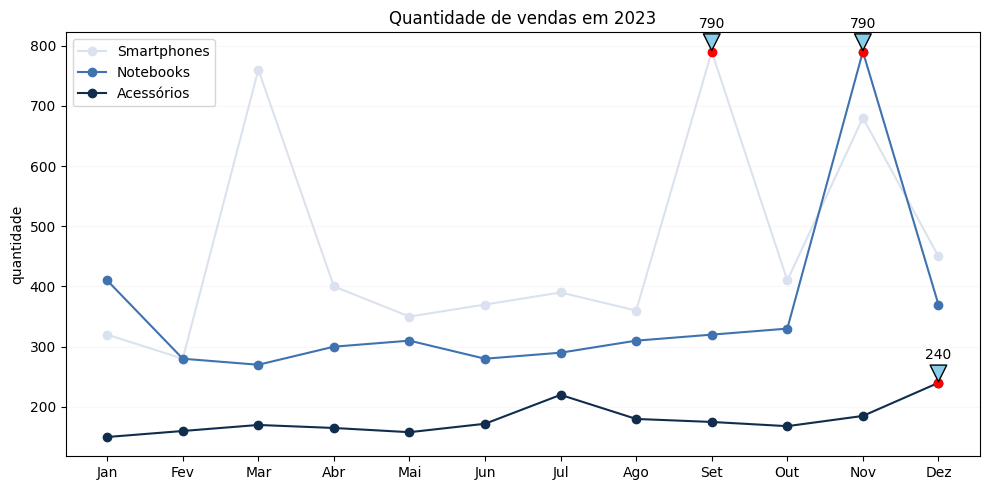

In [67]:
eixo_x = df_vendas_2023['Mês']

plt.figure(figsize=(10, 5))

# Smartphones
plt.plot(eixo_x, df_vendas_2023['Smartphones'], marker='o', label='Smartphones', color='#DBE2EF')
max_smart = df_vendas_2023['Smartphones'].max()
idx_smart = df_vendas_2023['Smartphones'].idxmax()
plt.plot(df_vendas_2023['Mês'][idx_smart], max_smart, 'ro')
plt.annotate(f'{max_smart}', 
             xy=(df_vendas_2023['Mês'][idx_smart], max_smart), 
             xytext=(idx_smart, max_smart + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')

# Notebooks
plt.plot(eixo_x, df_vendas_2023['Notebooks'], marker='o', label='Notebooks', color='#3F72AF')
max_note = df_vendas_2023['Notebooks'].max()
idx_note = df_vendas_2023['Notebooks'].idxmax()
plt.plot(df_vendas_2023['Mês'][idx_note], max_note, 'ro')
plt.annotate(f'{max_note}', 
             xy=(df_vendas_2023['Mês'][idx_note], max_note), 
             xytext=(idx_note, max_note + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')


plt.plot(eixo_x, df_vendas_2023['Acessórios'], marker='o', label='Acessórios', color='#112D4E')
max_acess = df_vendas_2023['Acessórios'].max()
idx_acess = df_vendas_2023['Acessórios'].idxmax()
plt.plot(df_vendas_2023['Mês'][idx_acess], max_acess, 'ro')
plt.annotate(f'{max_acess}', 
             xy=(df_vendas_2023['Mês'][idx_acess], max_acess), 
             xytext=(idx_acess, max_acess + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')



plt.grid(axis='y', color='#F9F7F7')
plt.legend()
plt.ylabel('quantidade')
plt.title('Quantidade de vendas em 2023')
plt.tight_layout()
# Salvando a imagem no caminho outputs
plt.savefig('../outputs/vendas_comparativo_2023.png', dpi=300, bbox_inches='tight')
plt.show()


## Estatísticas 2023

In [76]:
df_vendas_2023

,Mês,Ano,Smartphones,Notebooks,Acessórios
0,Jan,2023,475,410,150
1,Fev,2023,280,280,160
2,Mar,2023,760,270,170
3,Abr,2023,400,300,165
4,Mai,2023,350,310,158
5,Jun,2023,370,280,172
6,Jul,2023,390,290,220
7,Ago,2023,360,310,180
8,Set,2023,790,320,175
9,Out,2023,410,330,168


In [104]:
smartphones_2023 = list(df_vendas_2023['Smartphones'])
notebooks_2023 = list(df_vendas_2023['Notebooks'])
acessorios_2023 = list(df_vendas_2023['Acessórios'])

smartphones_2023 = round(statistics.mean(smartphones_2023),2)
notebooks_2023 = round(statistics.mean(notebooks_2023),2)
acessorios_2023 = round(statistics.mean(acessorios_2023),2)

print(f'A média de vendas por categoria em 2023 foi de:\nSmartphones: {smartphones_2023}, Notebooks:{notebooks_2023}, Acessórios: {acessorios_2023}')


A média de vendas por categoria em 2023 foi de:
Smartphones: 476.35, Notebooks:355, Acessórios: 178.58


In [ ]:
lista_categorias = ['Smartphones', 'Notebooks', 'Acessórios']
lista_medias = [smartphones_2023, notebooks_2023, acessorios_2023]
media_2023 = {}

for i,j in zip(lista_categorias, lista_medias):
    media_2023[i] = j

print(media_2023)

{'Smartphones': 476.35, 'Notebooks': 355, 'Acessórios': 178.58}


In [106]:
df_media_2023 = pd.DataFrame(media_2023, index=['Media'])
df_media_2023

,Smartphones,Notebooks,Acessórios
Media,476.35,355,178.58


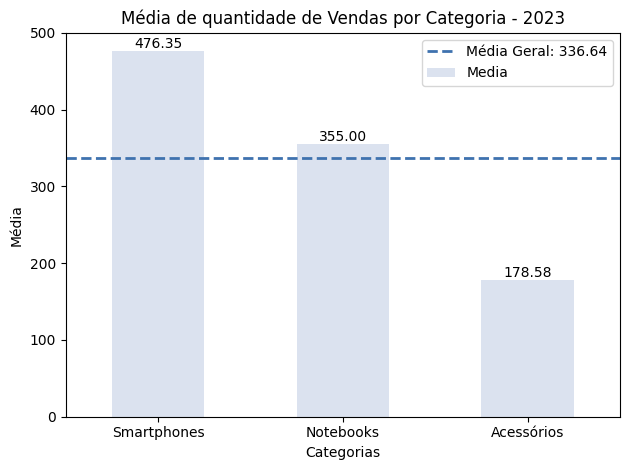

In [133]:

ax = df_media_2023.T.plot(kind='bar', legend=False, color=['#DBE2EF'])

# Adicionando título e rótulos
plt.title('Média de quantidade de Vendas por Categoria - 2023')
plt.ylabel('Média')
plt.xlabel('Categorias')
plt.xticks(rotation=0)  # Mantém os rótulos na horizontal


# Calculando e adicionando uma linha de média no gráfico
media_geral = df_media_2023.values.mean()
plt.axhline(y=media_geral, color='#3F72AF', linestyle='--', linewidth=2, label=f'Média Geral: {media_geral:.2f}')

# Adiciona os valores no topo de cada barra
for barra in ax.patches:
    valor = barra.get_height()
    ax.annotate(f'{valor:.2f}',
                (barra.get_x() + barra.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/media_qtd_vendas_2023.png', dpi=300, bbox_inches='tight')
plt.show()

#  📌 Ano de 2024

In [112]:
df_vendas_2024 = df_vendas[df_vendas['Ano'] == 2024]
df_vendas_2024.head()

,Mês,Ano,Smartphones,Notebooks,Acessórios
12,Jan,2024,340,430,160
13,Fev,2024,300,300,170
14,Mar,2024,820,290,180
15,Abr,2024,420,320,175
16,Mai,2024,360,330,168


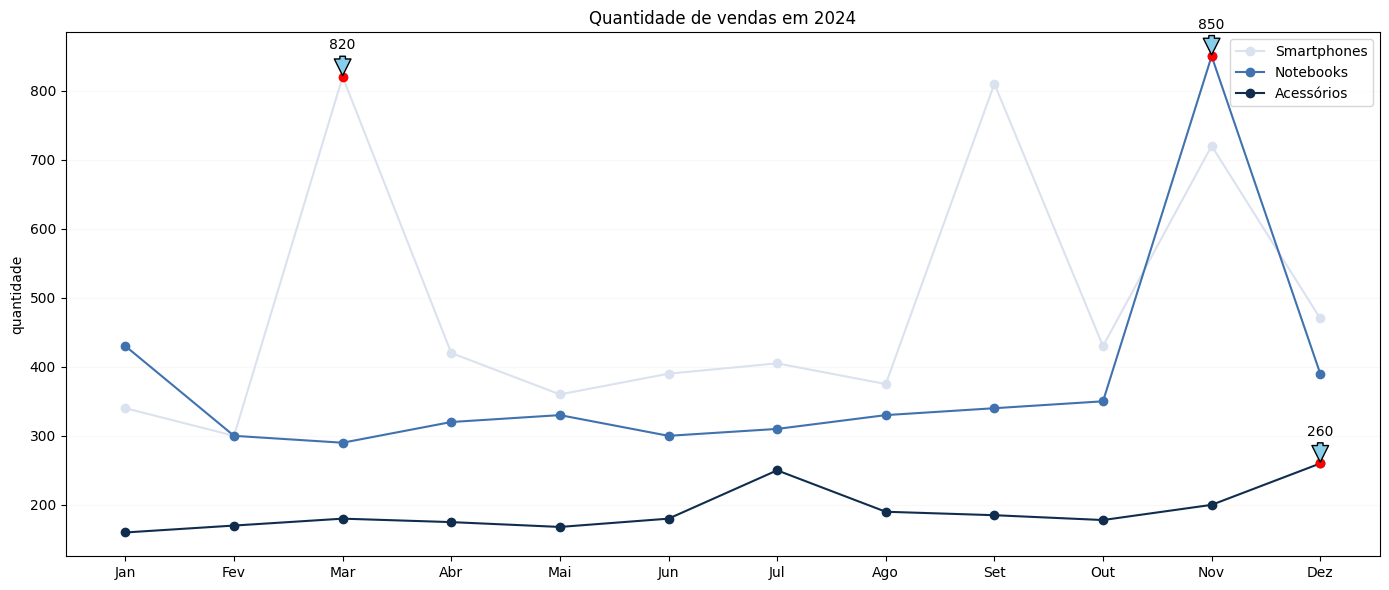

In [126]:
eixo_x = df_vendas_2024['Mês']

plt.figure(figsize=(14,6))

# Smartphones
plt.plot(eixo_x, df_vendas_2024['Smartphones'], marker='o', label='Smartphones', color='#DBE2EF')
max_smart = df_vendas_2024['Smartphones'].max()
idx_smart = df_vendas_2024['Smartphones'].idxmax()
plt.plot(df_vendas_2024['Mês'][idx_smart], max_smart, 'ro')
plt.annotate(f'{max_smart}', 
             xy=(df_vendas_2024['Mês'][idx_smart], max_smart), 
             xytext=(df_vendas_2024['Mês'][idx_smart], max_smart + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')


# Notebooks
plt.plot(eixo_x, df_vendas_2024['Notebooks'], marker='o', label='Notebooks', color='#3F72AF')
max_note = df_vendas_2024['Notebooks'].max()
idx_note = df_vendas_2024['Notebooks'].idxmax()
plt.plot(df_vendas_2024['Mês'][idx_note], max_note, 'ro')
plt.annotate(f'{max_note}', 
             xy=(df_vendas_2024['Mês'][idx_note], max_note), 
             xytext=(df_vendas_2024['Mês'][idx_note], max_note + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')



plt.plot(eixo_x, df_vendas_2024['Acessórios'], marker='o', label='Acessórios', color='#112D4E')
max_acess = df_vendas_2024['Acessórios'].max()
idx_acess = df_vendas_2024['Acessórios'].idxmax()
plt.plot(df_vendas_2024['Mês'][idx_acess], max_acess, 'ro')
plt.annotate(f'{max_acess}', 
             xy=(df_vendas_2024['Mês'][idx_acess], max_acess), 
             xytext=(df_vendas_2024['Mês'][idx_acess], max_acess + 40),
             arrowprops=dict(facecolor='skyblue', shrink=0.05),
             ha='center')



plt.grid(axis='y', color='#F9F7F7')
plt.legend()
plt.ylabel('quantidade')
plt.title('Quantidade de vendas em 2024')
plt.tight_layout()
# Salvando a imagem no caminho outputs
plt.savefig('../outputs/vendas_comparativo_2024.png', dpi=300, bbox_inches='tight')
plt.show()


## Estatísticas 2024

In [127]:
smartphones_2024 = list(df_vendas_2024['Smartphones'])
notebooks_2024 = list(df_vendas_2024['Notebooks'])
acessorios_2024 = list(df_vendas_2024['Acessórios'])

smartphones_2024 = round(statistics.mean(smartphones_2024),2)
notebooks_2024 = round(statistics.mean(notebooks_2024),2)
acessorios_2024 = round(statistics.mean(acessorios_2024),2)

print(f'A média de vendas por categoria em 2023 foi de:\nSmartphones: {smartphones_2024}, Notebooks:{notebooks_2024}, Acessórios: {acessorios_2024}')


A média de vendas por categoria em 2023 foi de:
Smartphones: 486.67, Notebooks:378.33, Acessórios: 191.33


In [128]:
lista_categorias = ['Smartphones', 'Notebooks', 'Acessórios']
lista_medias = [smartphones_2024, notebooks_2024, acessorios_2024]
media_2024 = {}

for i,j in zip(lista_categorias, lista_medias):
    media_2024[i] = j

print(media_2024)

{'Smartphones': 486.67, 'Notebooks': 378.33, 'Acessórios': 191.33}


In [130]:
df_media_2024 = pd.DataFrame(media_2024, index=['Media'])
df_media_2024

,Smartphones,Notebooks,Acessórios
Media,486.67,378.33,191.33


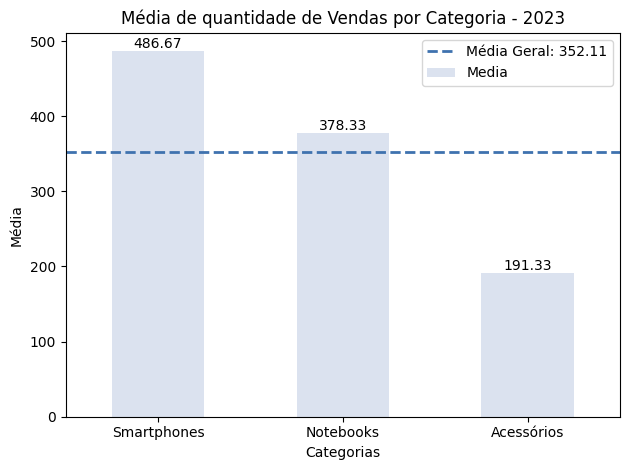

In [132]:

ax = df_media_2024.T.plot(kind='bar', legend=False, color=['#DBE2EF'])

# Adicionando título e rótulos
plt.title('Média de quantidade de Vendas por Categoria - 2023')
plt.ylabel('Média')
plt.xlabel('Categorias')
plt.xticks(rotation=0)  # Mantém os rótulos na horizontal


# Calculando e adicionando uma linha de média no gráfico
media_geral = df_media_2024.values.mean()
plt.axhline(y=media_geral, color='#3F72AF', linestyle='--', linewidth=2, label=f'Média Geral: {media_geral:.2f}')

# Adiciona os valores no topo de cada barra
for barra in ax.patches:
    valor = barra.get_height()
    ax.annotate(f'{valor:.2f}',
                (barra.get_x() + barra.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=10)

# Exibir o gráfico
plt.legend()
plt.tight_layout()
plt.savefig('../outputs/media_qtd_vendas_2024.png', dpi=300, bbox_inches='tight')
plt.show()

# 2024 X 2025


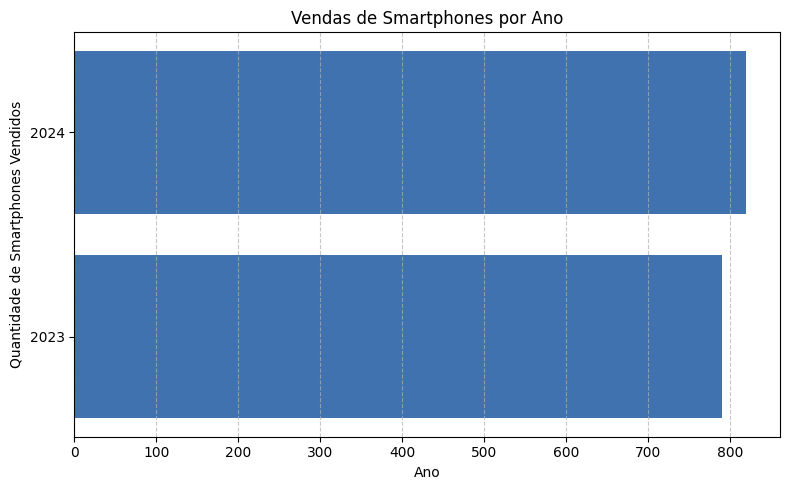

In [149]:
import matplotlib.pyplot as plt

# Suponha que esse seja seu DataFrame
smartphones_ano = df_vendas[['Ano', 'Smartphones']]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.barh(smartphones_ano['Ano'].astype(str), smartphones_ano['Smartphones'], color='#3F72AF')

plt.xlabel('Ano')
plt.ylabel('Quantidade de Smartphones Vendidos')
plt.title('Vendas de Smartphones por Ano')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
